# Simple Case Study - Image Classification

In [24]:
##  import the libraries first 

# Tensorflow & Keras Libraries
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

In [25]:
## Load the data from the dataset
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [26]:
## Next, we are going to map the images into classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
## Exploring the data
print(train_images.shape)

#Each Label is between 0-9
print(train_labels)

print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


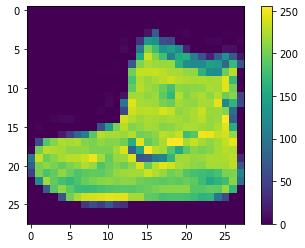

In [28]:
## Visualise some data.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## If you inspect the first image in the training set, 
## you will see that the pixel values fall in the range of 0 to 255.

In [29]:
## Pre-processing of the data 

## We have to scale the images from 0-1 to feed it into the Neural Network

train_images = train_images / 255.0

test_images = test_images / 255.0

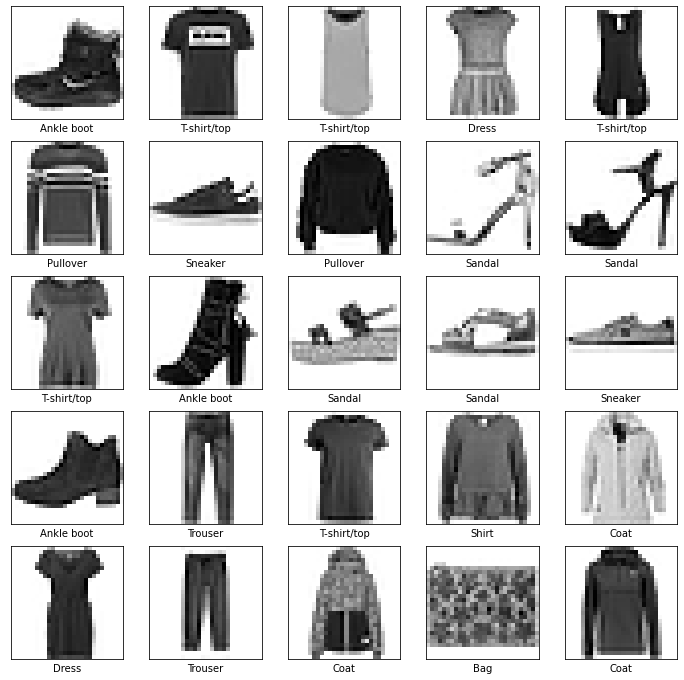

In [30]:
## Let’s display some images.

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [31]:
# Setup The Layers
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [34]:
## Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
## Model Training
model.fit(train_images, train_labels, epochs=10)

## default batch_size = None in keras, i.e taken 1 
## o/p : 60000 / 1 = 60000

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4984 - accuracy: 0.8238: 0s - loss: 0.5018 - accu
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3333 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3107 - accuracy: 0.8836: 0s - loss: 0.3105 - accuracy
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2462 - accuracy: 0.9079
Epoch 10/10
1875/1875 [===

In [36]:
## Evaluating Accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc*100)


313/313 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8855
Test accuracy: 88.55000138282776


In [38]:
## Making Predictions
predictions=model.predict(test_images)
predictions[0]

array([1.64032357e-07, 1.02034576e-08, 8.14001964e-07, 2.13739977e-08,
       1.39079805e-08, 1.48267020e-03, 2.51024687e-07, 9.19636432e-03,
       2.40555801e-06, 9.89317358e-01], dtype=float32)

**A prediction is an array of 10 numbers.** These describe the “confidence” of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value.

In [39]:
np.argmax(predictions[0])

9

In [40]:
## Model is most confident that it's an ankle boot. Let's see if it's correct

In [41]:
test_labels[0]

9

In [42]:
## Now, it’s time to look at the full set of 10 channels

In [43]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label= np.argmax(predictions_array)
    if predicted_label == true_label:
        color='green'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)

In [44]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

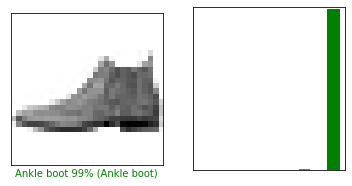

In [45]:
## Let’s look at the 0th and 10th image first
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

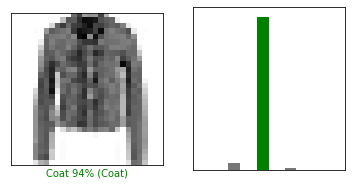

In [46]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

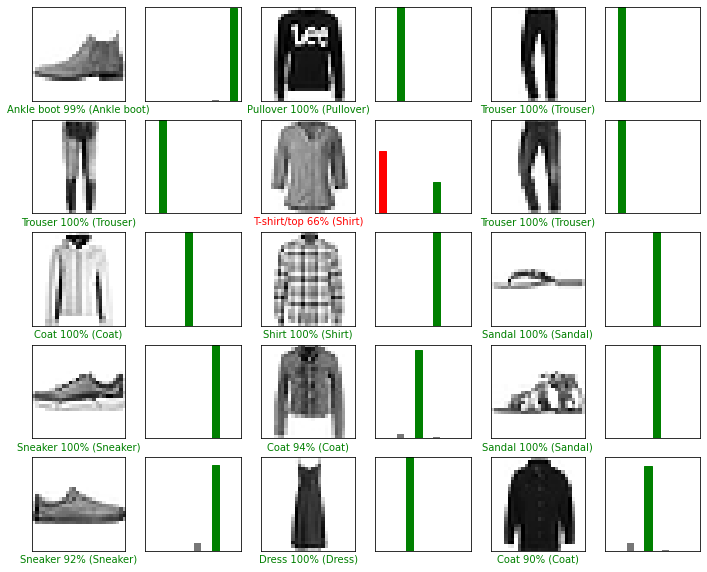

In [47]:
## Now, let’s plot several images and their predictions. 
## Correct ones are green, while the incorrect ones are red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [48]:
## Finally, we will use the trained model to make a prediction about a single image.
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img) 
print(predictions_single)

(28, 28)
(1, 28, 28)
[[1.6403250e-07 1.0203456e-08 8.1400185e-07 2.1373996e-08 1.3907979e-08
  1.4826708e-03 2.5102489e-07 9.1963857e-03 2.4055598e-06 9.8931724e-01]]


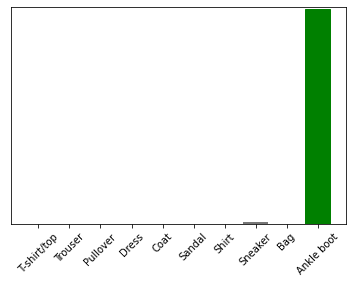

In [49]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [50]:
## you can see the prediction for our only image in batch.
prediction_result = np.argmax(predictions_single[0])
prediction_result

9